In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [171]:
claims=pd.read_csv("/Users/ankitadhawan/Desktop/PythonExercises/ALabs_caseStudies/CaseStudy3InsuranceClaims/claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [172]:
cust=pd.read_csv("/Users/ankitadhawan/Desktop/PythonExercises/ALabs_caseStudies/CaseStudy3InsuranceClaims/cust_demographics.csv")
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [173]:
df=pd.merge(left=claims, right= cust, how="left", left_on="customer_id", right_on="CUST_ID")
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [175]:
df.shape

(1100, 16)

#DOB, Claim Date and Claim amount are not in their original data types. Converting these variables into their orginal form

In [176]:
import datetime

In [177]:
df['claim_date']=pd.to_datetime(df['claim_date'])
df['DateOfBirth']=pd.to_datetime(df['DateOfBirth'])

In [178]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold


# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [179]:
df['claim_amount']=df['claim_amount'].str.replace('$', '').astype('float')
df.head()

/Users/ankitadhawan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  CUST_ID              1085 non-null   float64       
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [181]:
df['p_report_alert_flag']=np.where(df['police_report']=='Unknown', 1, 0)
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0


# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [182]:
df['customer_id']=df['customer_id'].drop_duplicates( keep='first')

In [183]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [184]:
#df_categorical=df.select_dtypes(include='object')
#df_numerical=df.select_dtypes(exclude='object')

In [185]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0


In [186]:
df.isnull().sum()

claim_id                0
customer_id             7
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
p_report_alert_flag     0
dtype: int64

In [187]:
def missing_imp(x):
    if x.dtype=='object':
        x=x.fillna(x.mode()[0])
    else:
        x=x.fillna(x.mean())
    return x

In [188]:
df=df.apply(missing_imp)

In [189]:
df.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
p_report_alert_flag    0
dtype: int64

In [190]:
#import statistics
#df["gender"] = df["gender"].replace(np.NaN, statistics.mode(df["gender"]))
#df["State"] = df["State"].replace(np.NaN, statistics.mode(df["State"]))
#df["Segment"] = df["Segment"].replace(np.NaN, statistics.mode(df["Segment"]))

# how to impute missing values in dates and contact no.

In [191]:
#df["customer_id"] = df["customer_id"].replace(np.NaN, df["customer_id"].mean())
#df["claim_amount"] = df["claim_amount"].replace(np.NaN, df["claim_amount"].mean())
#df["total_policy_claims"] = df["total_policy_claims"].replace(np.NaN, df["total_policy_claims"].mean())
#df["CUST_ID"] = df["CUST_ID"].replace(np.NaN, df["CUST_ID"].mean())

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [192]:
df["Age"]=(df["claim_date"]-df["DateOfBirth"]).dt.components[['days']]/365

In [193]:
df['Age']=df['Age'].apply(np.floor).astype(int)

In [194]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,38
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,1,-52
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,33
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,32
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0,40


In [195]:
import datetime as dt
df["DateOfBirth"]=np.where(pd.DatetimeIndex(df["DateOfBirth"]).year >=2020, df["DateOfBirth"] - pd.DateOffset(years=100), df["DateOfBirth"])


In [196]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,38
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,-52
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,33
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,32
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0,40


In [197]:
df["age_group"]=np.where(df["Age"]<18, "Children", np.where(df["Age"]<=30 ,"Youth",np.where(df["Age"]<=60, "Adult","Senior")))

In [198]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age,age_group
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,-52,Children
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,33,Adult
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0,40,Adult


# 8. What is the average amount claimed by the customers from various segments?

In [199]:
df.groupby(['Segment'])[['claim_amount']].mean().reset_index()

,Segment,claim_amount
0,Gold,12746.446802
1,Platinum,12340.893306
2,Silver,12206.379320


Gold has the average amount claimed by customers

# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [200]:
Current_Date='2018-10-01'

In [201]:
current_date=pd.to_datetime(Current_Date)

In [202]:
current_date

Timestamp('2018-10-01 00:00:00')

In [203]:
current_dt=current_date.date()

In [204]:
current_dt - pd.DateOffset(days=20)

Timestamp('2018-09-11 00:00:00')

In [205]:
# Atleast 20 days before 1 oct 2018 is 9 september 2018

df1=df.loc[df['claim_date']<'2018-09-11']

In [206]:
df1['claim_date']

0      2017-11-27
2      2018-02-02
3      2018-06-17
4      2018-01-13
5      2017-10-04
          ...    
1095   2017-06-11
1096   2018-03-14
1097   2018-02-09
1098   2018-03-21
1099   2017-06-04
Name: claim_date, Length: 1008, dtype: datetime64[ns]

In [207]:
total_claim=df1.groupby(['incident_cause'])[['claim_amount']].sum().reset_index()

In [208]:
total_claim

,incident_cause,claim_amount
0,Crime,7.294726e+05
1,Driver error,3.348656e+06
2,Natural causes,1.316441e+06
3,Other causes,3.779869e+06
4,Other driver error,3.384045e+06


In [209]:
df['claim_amount'].sum()

13686337.63285024

The total claim amount based on incident cause for all the claims that have been done at
least 20 days prior to 1st of October, 2018 is 13686337

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [210]:
driver=df.groupby(['State','incident_cause'])[['customer_id']].count()
driver

customer_id
State incident_cause                 
AK    Driver error                  7
      Natural causes                4
      Other causes                  5
      Other driver error            4
AL    Crime                         2
...                               ...
WY    Crime                         1
      Driver error                  6
      Natural causes                3
      Other causes                  3
      Other driver error            4

[242 rows x 1 columns]

In [211]:
adults_from_state=driver.loc[["TX", "DE", "AK"]]

In [212]:
adults_from_state=adults_from_state.reset_index()
adults_from_state

,State,incident_cause,customer_id
0,TX,Crime,1
1,TX,Driver error,6
2,TX,Natural causes,5
3,TX,Other causes,6
4,TX,Other driver error,4
5,DE,Crime,2
6,DE,Driver error,10
7,DE,Natural causes,5
8,DE,Other causes,7
9,DE,Other driver error,5


In [213]:
adults_driver_claims=adults_from_state.loc[adults_from_state['incident_cause']=='Driver error']
adults_driver_claims

,State,incident_cause,customer_id
1,TX,Driver error,6
6,DE,Driver error,10
10,AK,Driver error,7


In [214]:
adults_driver_claims['customer_id'].sum()

23

 There are 23 adults from TX, DE and AK who claimed insurance for driver related issues and causes.

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [215]:
df.groupby(['gender','Segment'])[['claim_amount']].sum().reset_index()

,gender,Segment,claim_amount
0,Female,Gold,2.109508e+06
1,Female,Platinum,2.369305e+06
2,Female,Silver,1.901580e+06
3,Male,Gold,2.861606e+06
4,Male,Platinum,2.098099e+06
5,Male,Silver,2.346240e+06


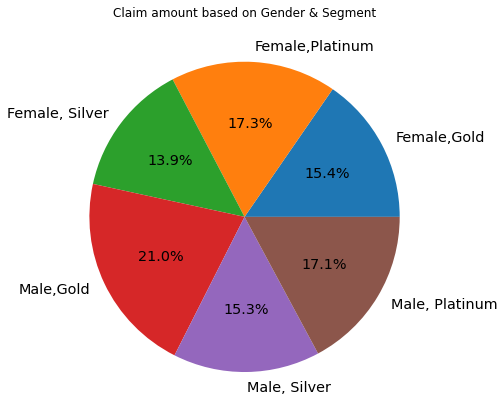

In [216]:
x = [2.10, 2.36, 1.90,2.86,2.09,2.34 ]
labels = ['Female,Gold', 'Female,Platinum', 'Female, Silver', 'Male,Gold', 'Male, Silver', 'Male, Platinum']

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(x, labels=labels, autopct='%.1f%%', textprops={'size': 'x-large'})
ax.set_title('Claim amount based on Gender & Segment')
plt.tight_layout()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

<AxesSubplot:xlabel='incident_cause'>

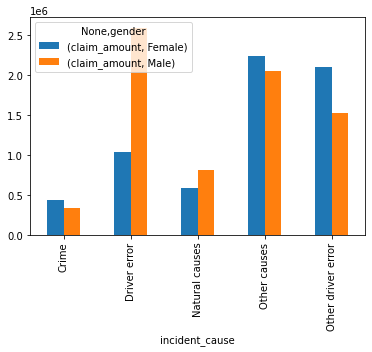

In [217]:
df.pivot_table(index=["incident_cause"], columns=["gender"], values=["claim_amount"],aggfunc=np.sum).plot(kind="bar")

From the bar chart, one can infer that males claimed the most for driver related errors whereas females claimed more
for other driver related issues

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [218]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age,age_group
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,-52,Children
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,33,Adult
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0,40,Adult


<AxesSubplot:xlabel='age_group'>

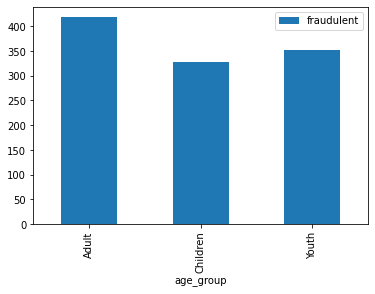

In [219]:
df.groupby(['age_group'])[['fraudulent']].count().plot(kind="bar")

Adults have the maximum fraudelent claims

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [220]:
df['claim_month']=df['claim_date'].dt.month
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age,age_group,claim_month
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult,11
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,-52,Children,10
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,33,Adult,2
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult,6
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0,40,Adult,1


In [221]:
claim=df.groupby(['claim_month'])[['claim_amount']].sum().reset_index()
claim

,claim_month,claim_amount
0,1,1.331813e+06
1,2,1.193379e+06
2,3,1.348302e+06
3,4,1.293835e+06
4,5,1.115015e+06
5,6,1.320222e+06
6,7,1.382470e+06
7,8,9.134069e+05
8,9,9.826043e+05
9,10,1.453690e+06


In [222]:
import plotly.express as px

In [223]:
fig1=px.line(claim, x="claim_month", y="claim_amount", title="Monthly trend of total amount")

fig1.show()

October had the highest amount claimed, post which the amount claim fell down in november and december

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [224]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age,age_group,claim_month
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult,11
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,-52,Children,10
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,33,Adult,2
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult,6
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0,40,Adult,1


In [225]:
gender=df.groupby(['gender','fraudulent'])[['claim_amount']].mean().reset_index()

In [226]:
gender

,gender,fraudulent,claim_amount
0,Female,No,12371.018306
1,Female,Yes,11070.414692
2,Male,No,12213.028507
3,Male,Yes,14809.166999


In [227]:
import plotly.express as px

In [228]:
fig = px.bar(gender, x="gender", y="claim_amount", facet_col="fraudulent",title="Gender wise average claim amount")
fig.show()

Males have higher average amount of claims than females

In [229]:
age_cat=df.groupby(['age_group','fraudulent'])[['claim_amount']].mean().reset_index()

In [230]:
age_cat

,age_group,fraudulent,claim_amount
0,Adult,No,12343.969528
1,Adult,Yes,17739.593430
2,Children,No,12290.048675
3,Children,Yes,11025.330360
4,Youth,No,12221.848928
5,Youth,Yes,9054.086680


In [231]:
fig = px.bar(age_cat, x="age_group", y="claim_amount", facet_col="fraudulent",title="Age wise average claim amount")
fig.show()

Adults have higher average claim amounts than other age groups.

# 16. Is there any similarity in the amount claimed by males and females?

In [232]:
male_claim_amount = df.claim_amount.loc[(df.gender=='Male')]
female_claim_amount = df.claim_amount.loc[(df.gender=='Female')]

In [233]:
female_claim_amount.mean()

12061.233702272999

In [234]:
male_claim_amount.mean()

12795.000007614408

In [235]:
#df.groupby(['gender'])[['claim_amount']].mean().reset_index()

stats.ttest_ind(a=,b=)
H0 : Male amount claimed==Female amount claimed
H1 : Male amount claimed!= Female amount claimed

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math


import scipy.stats as stats

In [238]:
uneq_var = stats.ttest_ind(a= male_claim_amount,
                b= female_claim_amount,
                equal_var=False)    # Unequal variance
uneq_var

Ttest_indResult(statistic=0.9116109971881311, pvalue=0.3621740357735377)

In [239]:
eq_var = stats.ttest_ind(a= male_claim_amount,
                b= female_claim_amount,
                equal_var=True)    # Equal variance
eq_var.statistic

0.910525219359747

In [240]:
# We'll cosider equal variance since the t score is not having a huge difference
uneq_var.statistic - eq_var.statistic

0.001085777828384149

In [241]:
eq_var.pvalue > 0.05

True

In [242]:
eq_var.pvalue

0.3627454254155197

In [ ]:
# we fail to reject NUll, meaning we have evidence to prove that male claim amount is the same as female claim amount.
# gender is not influencing the Claim amount

# 17. Is there any relationship between age category and segment?

In [243]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age,age_group,claim_month
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult,11
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,-52,Children,10
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,33,Adult,2
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult,6
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0,40,Adult,1


In [ ]:
#to find out the relationship between age category and segment, we do a chi-square test

In [244]:
df.Segment.value_counts()

Gold        390
Platinum    362
Silver      348
Name: Segment, dtype: int64

In [245]:
df.age_group.value_counts()

Adult       419
Youth       353
Children    328
Name: age_group, dtype: int64

In [246]:
seg_age_xtab = pd.crosstab(df.Segment, df.age_group,margins=True)
seg_age_xtab

age_group,Adult,Children,Youth,All
Segment,,,,
Gold,151,121,118,390
Platinum,134,107,121,362
Silver,134,100,114,348
All,419,328,353,1100


In [247]:
x2test = stats.chi2_contingency(observed= seg_age_xtab)
x2test

# (chi square score,
#  p-value,
#  degrees of freedom (sample_size - 1),
#  expected values matrix
#)

(1.1595832087409357,
 0.9989729895750452,
 9,
 array([[ 148.55454545,  116.29090909,  125.15454545,  390.        ],
        [ 137.88909091,  107.94181818,  116.16909091,  362.        ],
        [ 132.55636364,  103.76727273,  111.67636364,  348.        ],
        [ 419.        ,  328.        ,  353.        , 1100.        ]]))

In [248]:
print("The chi square stat is {} and the p value is {}".format(x2test[0],x2test[1]))

The chi square stat is 1.1595832087409357 and the p value is 0.9989729895750452


In [249]:
x2test[1] < 0.05

False

Since the p-value is not less than 0.05, age_group and segment do not have a statistical significance 

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


In [250]:
df['claim_date'].sort_values(ascending=False)

282    2018-10-30
350    2018-10-30
1077   2018-10-30
1086   2018-10-30
751    2018-10-30
          ...    
177    2017-01-01
191    2017-01-01
116    2017-01-01
308    2017-01-01
1064   2017-01-01
Name: claim_date, Length: 1100, dtype: datetime64[ns]

In [ ]:
#The current year is '2018-10-30', use 1 sample t test

In [260]:
current_dt=df.loc[(df["claim_date"]>'2017-03-01') & (df["claim_date"]<='2018-10-30')]
current_dt

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,p_report_alert_flag,Age,age_group,claim_month
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,2.186859e+07,Female,1979-01-12 00:00:00.000000000,VT,789-916-8172,Platinum,0,38,Adult,11
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,7.574042e+07,Female,1970-01-13 00:00:00.000000000,ME,265-543-1264,Silver,1,-52,Children,10
2,53522022,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,3.030836e+07,Female,1984-03-11 00:00:00.000000000,TN,798-631-4758,Silver,0,33,Adult,2
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,4.783048e+07,Female,1986-05-01 00:00:00.000000000,MA,413-187-7945,Silver,0,32,Adult,6
4,22890252,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,1.926996e+07,Male,1977-05-13 00:00:00.000000000,NV,956-871-8691,Gold,0,40,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,5.076790e+07,Male,2008-05-19 23:50:42.580645120,NY,413-187-7945,Gold,0,9,Children,6
1096,10247193,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,5.076790e+07,Male,2008-05-19 23:50:42.580645120,NY,413-187-7945,Gold,0,9,Children,3
1097,79807493,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,5.076790e+07,Male,2008-05-19 23:50:42.580645120,NY,413-187-7945,Gold,0,9,Children,2
1098,69299345,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,5.076790e+07,Male,2008-05-19 23:50:42.580645120,NY,413-187-7945,Gold,1,9,Children,3


In [261]:
current_avg_claim=current_dt.groupby(["claim_date"])[["claim_amount"]].mean().reset_index()
current_avg_claim

,claim_date,claim_amount
0,2017-03-02,5263.818182
1,2017-03-09,10467.500000
2,2017-03-16,11682.971163
3,2017-03-22,10301.962512
4,2017-03-29,16828.950000
...,...,...
86,2018-10-03,11738.070320
87,2018-10-09,16071.964286
88,2018-10-16,13314.333333
89,2018-10-23,12252.270853


In [263]:
current_avg_claim['claim_amount'].mean()

12612.951997380145

Ho:previous_yr_avg_claim_amt=10,000
Ha:current_yr_avg_claim_amt>10,000

In [264]:
stats.ttest_1samp(a=current_avg_claim.claim_amount, popmean=10000)

Ttest_1sampResult(statistic=5.904935277371391, pvalue=6.162381362327124e-08)

In [266]:
ttest_1 = stats.ttest_1samp(a=current_avg_claim.claim_amount, popmean = 10000)
t_score = round(ttest_1.statistic,2)
p_value = ttest_1.pvalue

# CI : 0.95 or 95%
# alpha = 0.05
# if p value < alpha then rject NULL and 
# if it is >= alpha, we fail to reject NULL

In [267]:
print("The p value is {} and the T Score is {}".format(p_value,t_score))

The p value is 6.162381362327124e-08 and the T Score is 5.9


In [268]:
current_avg_claim.claim_amount.mean()

12612.951997380145

In [269]:
ttest_1

Ttest_1sampResult(statistic=5.904935277371391, pvalue=6.162381362327124e-08)

In [ ]:
# The current year has shown a significant rise in claim amounts
# than the last year, hence we conclude 
# that this year, there has been an increase in the claim amount as compared to 2016-17

# 19. Is there any difference between age groups and insurance claims?
ANOVA

In [ ]:
# To understand if there is any difference between age groups and insurance claims
H0  : mean age_group 1 == mean age_group 2 == mean age_group 3
H1  : mean age_group 1 <> mean age_group 2 <> mean age_group 3
    (age is influencing the claims)

In [ ]:
df.groupby(['age_group'])[['total_policy_claims']].count()

In [ ]:
s1 = df.total_policy_claims.loc[df.age_group=='Adult']
s2 = df.total_policy_claims.loc[df.age_group=='Youth']
s3 = df.total_policy_claims.loc[df.age_group=='Children']

# Perform the ANOVA
aov = stats.f_oneway(s1, s2, s3)

In [ ]:
# Statistic :  F Value
print("The f-value is {} and the p value is {}".format(aov.statistic,aov.pvalue))

In [ ]:
print(s1.mean()); print(s2.mean()); print(s3.mean())

#there is a difference between age groups and policy claims although the mean of adulr and youth is close to the 
#same number

# 20. Is there any relationship between total number of policy claims and theclaimed amount? 
correlation

In [270]:
import seaborn as sns

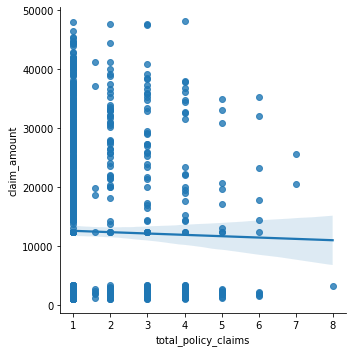

In [271]:
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = df)

In [272]:
print(np.corrcoef(df.total_policy_claims, df.claim_amount))

[[ 1.         -0.01949078]
 [-0.01949078  1.        ]]


In [273]:
print(stats.pearsonr(df.total_policy_claims, df.claim_amount))

(-0.01949078142813672, 0.5184332037402399)


there is little to no relationship between total number of policy claims and theclaimed amount